In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

In [17]:
supplies_data = pd.read_csv("../inputData/supplies.csv")
features_to_keep = ['PATIENT', 'CODE', 'DESCRIPTION', 'QUANTITY']
supplies_data = supplies_data[features_to_keep]
supplies_data.head(10)

,PATIENT,CODE,DESCRIPTION,QUANTITY
0,8248bf6a-5c58-768c-9236-df0a070e165c,409534002,Disposable air-purifying respirator (physical ...,2
1,8248bf6a-5c58-768c-9236-df0a070e165c,713779008,Nitrile examination/treatment glove non-powde...,24
2,8248bf6a-5c58-768c-9236-df0a070e165c,469673003,Isolation gown single-use (physical object),12
3,8248bf6a-5c58-768c-9236-df0a070e165c,706724001,Face shield (physical object),2
4,8248bf6a-5c58-768c-9236-df0a070e165c,419343004,Alcohol disinfectant (substance),1
5,8248bf6a-5c58-768c-9236-df0a070e165c,470618009,Antiseptic towelette (physical object),8
6,8248bf6a-5c58-768c-9236-df0a070e165c,409534002,Disposable air-purifying respirator (physical ...,2
7,8248bf6a-5c58-768c-9236-df0a070e165c,713779008,Nitrile examination/treatment glove non-powde...,24
8,8248bf6a-5c58-768c-9236-df0a070e165c,469673003,Isolation gown single-use (physical object),12
9,8248bf6a-5c58-768c-9236-df0a070e165c,706724001,Face shield (physical object),2


In [18]:
supplies_data.isnull().sum()

PATIENT        0
CODE           0
DESCRIPTION    0
QUANTITY       0
dtype: int64

In [19]:
n = len(pd.unique(supplies_data['PATIENT']))
n

127

In [20]:
supplies_data = supplies_data.drop(['CODE', 'DESCRIPTION'], axis=1)
supplies_data

,PATIENT,QUANTITY
0,8248bf6a-5c58-768c-9236-df0a070e165c,2
1,8248bf6a-5c58-768c-9236-df0a070e165c,24
2,8248bf6a-5c58-768c-9236-df0a070e165c,12
3,8248bf6a-5c58-768c-9236-df0a070e165c,2
4,8248bf6a-5c58-768c-9236-df0a070e165c,1
...,...,...
9900,afb343e7-2430-244e-79f6-2a8a84a1bc2c,24
9901,afb343e7-2430-244e-79f6-2a8a84a1bc2c,12
9902,afb343e7-2430-244e-79f6-2a8a84a1bc2c,2
9903,afb343e7-2430-244e-79f6-2a8a84a1bc2c,1


In [21]:
data = supplies_data.values.tolist()
data

[['8248bf6a-5c58-768c-9236-df0a070e165c', 2],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 24],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 12],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 2],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 1],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 8],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 2],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 24],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 12],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 2],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 1],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 8],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 2],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 24],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 12],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 2],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 1],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 8],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 2],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 24],
 ['8248bf6a-5c58-768c-9236-df0a070e165c', 12],
 ['8248bf6a-5c58-768c-9236

In [25]:
newDict = {}
for i in data:
    if i[0] in newDict:
        newDict[i[0]] = newDict[i[0]] + i[1]
    else:
        newDict[i[0]] = i[1]
newDict

{'8248bf6a-5c58-768c-9236-df0a070e165c': 1223,
 '4b9c337a-59e9-cc83-3616-18318f9e8c09': 490,
 '55ae02fe-4552-44d2-8bc3-ff7543c65ec7': 637,
 '7135bb73-5932-5e69-1de3-fdb86b89258e': 441,
 '51f702d8-737c-56bf-40bd-a83e479b0da7': 911,
 '2b2edf54-e302-5f4d-03b0-a92fabddd8a4': 637,
 '955f796f-7c49-6455-c8fa-16d9d933b6ff': 1310,
 '0d89ffb8-6dfe-86c1-fedd-36e9734f4552': 441,
 '39537909-1173-7b25-2311-1a83e0c75a0e': 637,
 'b7ab3b9b-98a4-24b5-8994-0239f550ead8': 441,
 '9cb3f45e-c799-afde-14d1-98618fd807f1': 490,
 '089d855f-f73f-dfa4-bec5-ea5c44f42dd4': 637,
 'e7ebe2d8-57d4-67a5-7939-6774b1db25a8': 441,
 '8a7d4068-5c2b-7f72-7ca4-e41e24792541': 441,
 'f0c3350e-1e44-127b-4a62-fbd20aa02b38': 588,
 '541f1f27-f816-e5dc-f287-faa9cb6d0811': 539,
 '2d57a926-4c87-a582-cf6a-abb8da75a40b': 490,
 'b0d630d6-0883-6168-8b2e-42e525b3bbbf': 989,
 '11243a00-0e8d-edee-ca07-f2a3b19f5d68': 588,
 '8e4fdc38-a2b4-ead6-3a24-83da18e03a79': 441,
 '27d3bbbe-2399-3b7c-d19c-0ccc344774f0': 686,
 '16defdca-7a63-ede3-ef37-17358e

In [31]:
newData = pd.DataFrame(newDict.items(), columns=['Patient', 'Count'])
newData

,Patient,Count
0,8248bf6a-5c58-768c-9236-df0a070e165c,1223
1,4b9c337a-59e9-cc83-3616-18318f9e8c09,490
2,55ae02fe-4552-44d2-8bc3-ff7543c65ec7,637
3,7135bb73-5932-5e69-1de3-fdb86b89258e,441
4,51f702d8-737c-56bf-40bd-a83e479b0da7,911
...,...,...
122,d4198a18-9948-c153-4e92-e36e54c8333d,539
123,55b80d6b-e512-0dc1-02c9-cb34e580c6bc,441
124,d7594d80-7d44-4909-838e-566a3bdf3785,588
125,2c1e28ae-b43b-182b-25b4-cd4a9ba15783,637


<AxesSubplot:ylabel='Frequency'>

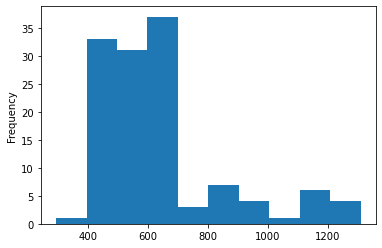

In [32]:
newData['Count'].plot.hist()